In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Template Matching

In [2]:
full = cv2.imread(r'C:\Users\DELL\Downloads\CV_Course\sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

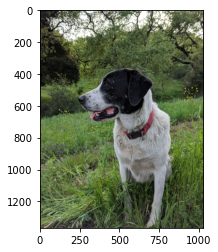

In [3]:
plt.imshow(full)

In [14]:
full.shape

(1367, 1025, 3)

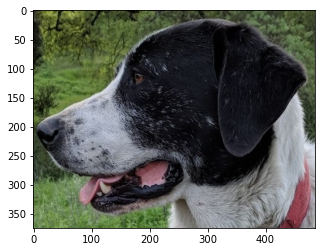

In [12]:
face = cv2.imread(r'C:\Users\DELL\Downloads\CV_Course\sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [13]:
face.shape

(375, 486, 3)

In [15]:
mystring = 'sum'
eval(mystring)

<function sum(iterable, /, start=0)>

In [16]:
myfunc = eval(mystring)
myfunc([1,2,3])

6

In [17]:
# all the 6 method for comparison in a list
# Note how we are using strings , later on we will use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

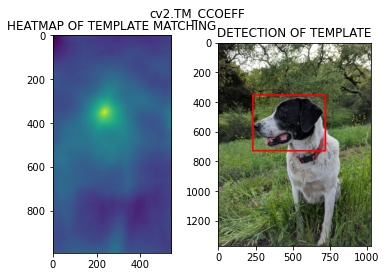

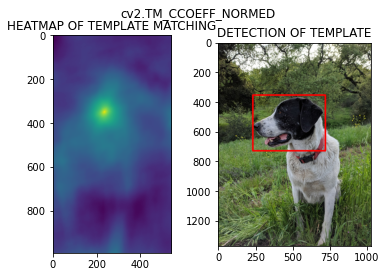

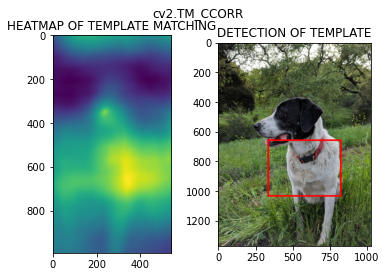

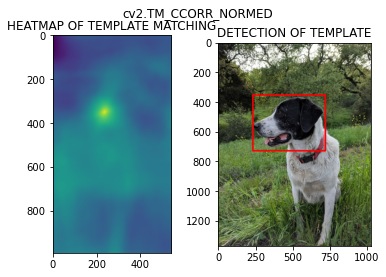

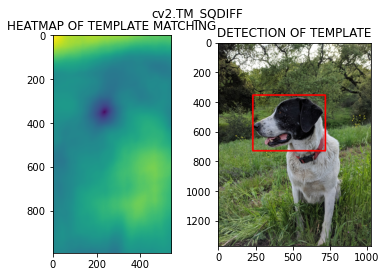

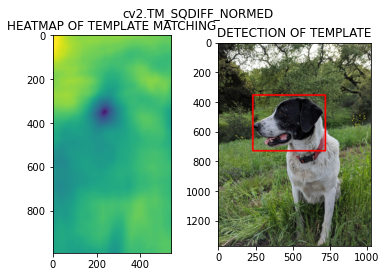

In [19]:
for m in methods:
    
    # CREATE A COPY
    full_copy = full.copy()
    
    method = eval(m)
    
    # TEMPELATE Matching
    res = cv2.matchTemplate(full_copy,face,method)

    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc #(x,y)
    else:
        top_left = max_loc
        
    height , width, channels = face.shape
    
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    # PLOT AND SHOW THE IMAGES
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title("HEATMAP OF TEMPLATE MATCHING")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    # TITLE WITH THE METHOD USED
    plt.suptitle(m)
    plt.show()
    
    print('\n')
    print('\n')

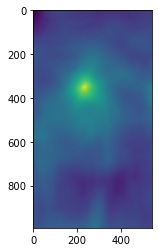

In [18]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full,face,my_method)
plt.imshow(res)

# Corner Detection

### Harris Corner Detection

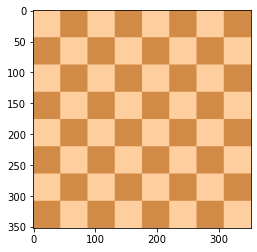

In [25]:
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

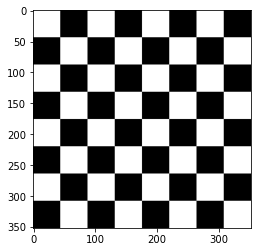

In [26]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

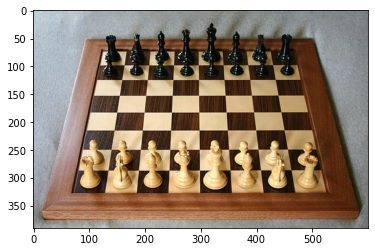

In [27]:
real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

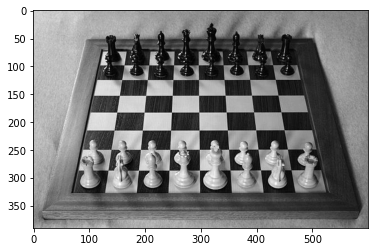

In [28]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [29]:
gray = np.float32(gray_flat_chess)

In [30]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [31]:
dst = cv2.dilate(dst,None)

In [32]:
flat_chess[dst>0.01*dst.max()] = [255,0,0] #RGB

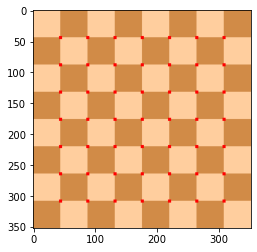

In [33]:
plt.imshow(flat_chess)

In [34]:
gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [35]:
dst = cv2.dilate(dst,None)

In [36]:
real_chess[dst>0.01*dst.max()] = [255,0,0]

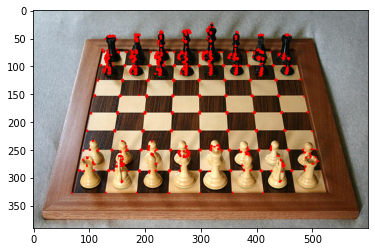

In [37]:
plt.imshow(real_chess)

### Shi-Tomasi Corner Detection

In [38]:
real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

In [39]:
# cv2.goodFeaturesToTrack(IMAGE,maxCorner,QUALITY LEVEL PARAMETER, Min Distance)                                               
corners = cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10)

In [40]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]]], dtype=float32)

In [42]:
corners = np.int0(corners)

In [43]:
for i in corners:
    x ,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,[255,0,0],-1)

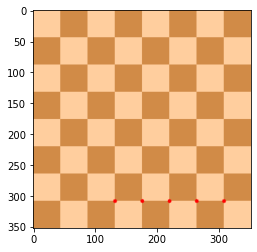

In [44]:
plt.imshow(flat_chess)

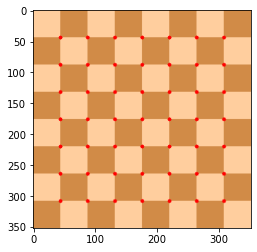

In [48]:
# cv2.goodFeaturesToTrack(IMAGE,maxCorner,QUALITY LEVEL PARAMETER, Min Distance)                                               
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)
corners = np.int0(corners)
for i in corners:
    x ,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,[255,0,0],-1)
    
plt.imshow(flat_chess)

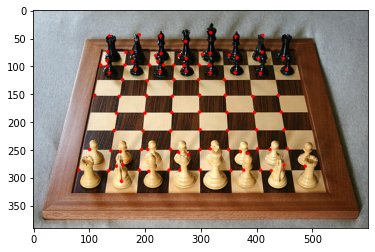

In [50]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,100,0.01,10)
corners = np.int0(corners)
for i in corners:
    x ,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,[255,0,0],-1)
    
plt.imshow(real_chess)

# Edge Detection

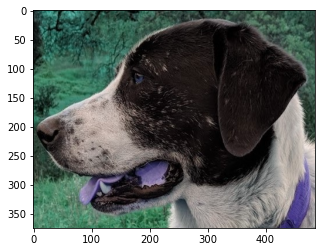

In [51]:
img = cv2.imread('sammy_face.jpg')
plt.imshow(img)

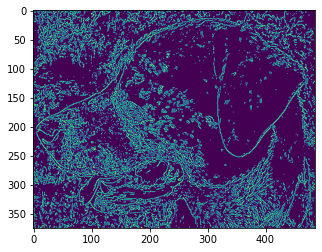

In [54]:
edges = cv2.Canny(image=img,threshold1=127,threshold2=127)
plt.imshow(edges)

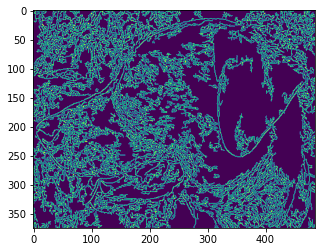

In [55]:
edges = cv2.Canny(image=img,threshold1=0,threshold2=255)
plt.imshow(edges)

In [57]:
med_value = np.median(img)
med_value

66.0

In [58]:
# LOWER THRESHOLD TO EITHER 0 OR 70% OF THE MEDIAN VALUE WHICHEVER IS GREATER 
lower = int(max(0,0.7*med_value))
# UPPER THRESHOLD TO EITHER 130% OF THE MEDIAN OR THE MAX 255 , WHICHEVER IS SMALLER
upper = int(min(0,1.3*med_value))

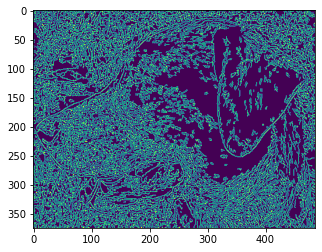

In [61]:
edges = cv2.Canny(image=img,threshold1=lower,threshold2=upper+100)
plt.imshow(edges)

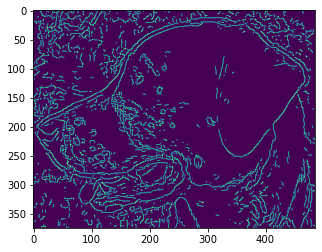

In [68]:
blurred_img = cv2.blur(img,ksize=(7,7))
edges = cv2.Canny(image=blurred_img,threshold1=lower,threshold2=upper+50)
plt.imshow(edges)

# Grid Detection

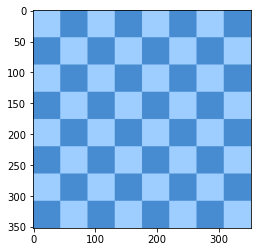

In [69]:
flat_chess = cv2.imread('flat_chessboard.png')
plt.imshow(flat_chess)

In [86]:
# the chess is 8*8 so we choosed 7*7 because it is not going to be able to detect that very last one
found,corners = cv2.findChessboardCorners(flat_chess,(7,7))

In [87]:
found

True

In [88]:
cv2.drawChessboardCorners(flat_chess,(7,7),corners,found)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

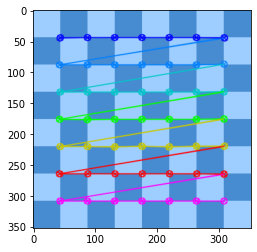

In [89]:
plt.imshow(flat_chess)

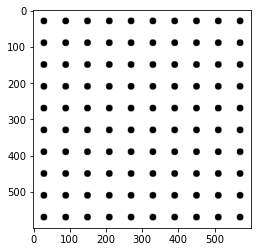

In [76]:
dots = cv2.imread('dot_grid.png')
plt.imshow(dots)

In [77]:
found,corners = cv2.findCirclesGrid(dots,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)
found

True

In [79]:
# corners

In [80]:
cv2.drawChessboardCorners(dots,(10,10),corners,found)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

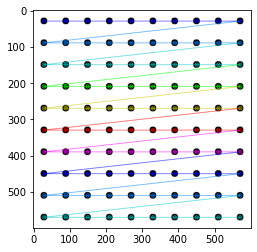

In [81]:
plt.imshow(dots)

# Feature Matching Detection

In [4]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

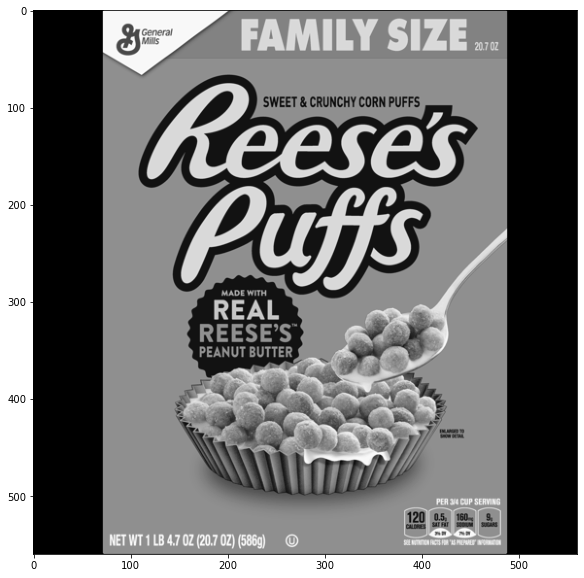

In [4]:
reeses = cv2.imread('reeses_puffs.png',0)
display(reeses)

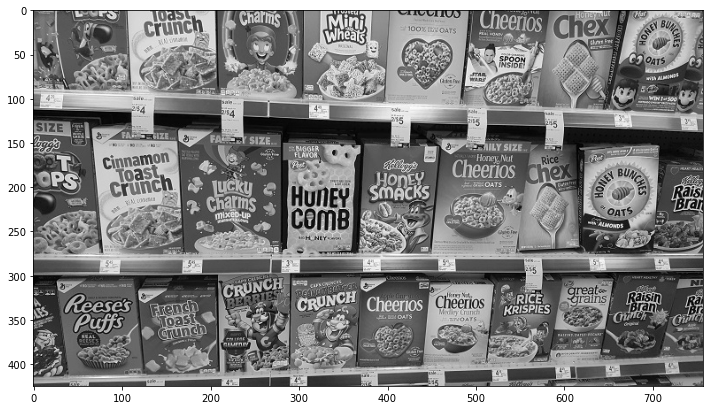

In [6]:
cereals = cv2.imread('many_cereals.jpg',0)
display(cereals)

In [8]:
orb = cv2.ORB_create()

In [9]:
kp1 ,des1 = orb.detectAndCompute(reeses,None)
kp2 ,des2 = orb.detectAndCompute(cereals,None)

In [10]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [12]:
matches = bf.match(des1,des2)

In [15]:
single_match = matches[0]
single_match.distance

56.0

In [17]:
len(matches)

139

In [16]:
matches = sorted(matches,key=lambda x:x.distance)

In [19]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[0:25],None,flags=2)

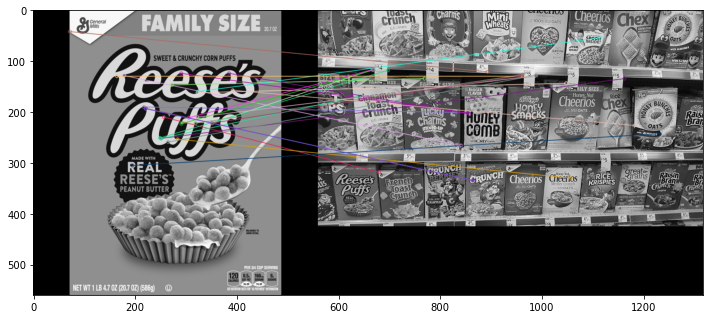

In [20]:
display(reeses_matches)

In [24]:
sift = cv2.SIFT_create()

In [25]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [26]:
bf = cv2.BFMatcher()

In [27]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [28]:
# FIND THE K BEST MATCHES FOR EACH DESCRIPTOR FROM A QUERY SET
matches = bf.knnMatch(des1,des2,k=2)

In [31]:
good = []

# LESS DISTANCE == BETTER MATCH
# RATIO MATCH1 < 75% MATCH2
for match1, match2 in matches:
    # IF MATCH1 DISTANCE LESS THAN 0.75 OF THE MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH , LETS KEEP IT
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [34]:
len(matches)

1501

In [33]:
len(good)

79

In [35]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

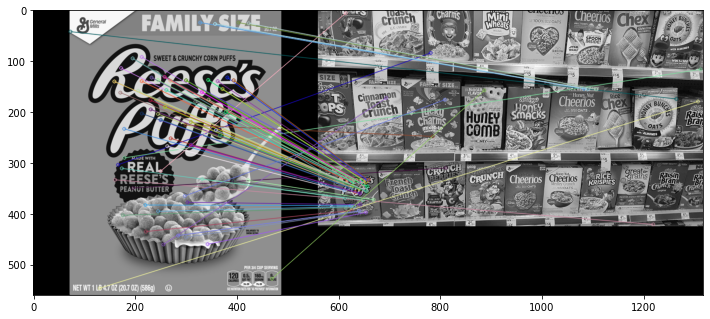

In [36]:
display(sift_matches)

In [41]:
# FLANN based Matcher
# Fast Library for Approx Nearest Neighbours
# It is fast than SIFT with Ratio ratio but doesn't find best matches but general good matches

In [33]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [36]:
flann_index_KDtree = 0
index_params = dict(algorithm=flann_index_KDtree,trees=5)
search_params = dict(checks=50)

In [37]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [38]:
matches = flann.knnMatch(des1,des2,k=2)

In [39]:
good =[]
# LESS DISTANCE -- BETTER THE MATCH
for match1,match2 in matches:
  #if MATCH1 DISTANCE is < 75% of MATCH 2 THEN IT IS A GOOD MATCH
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

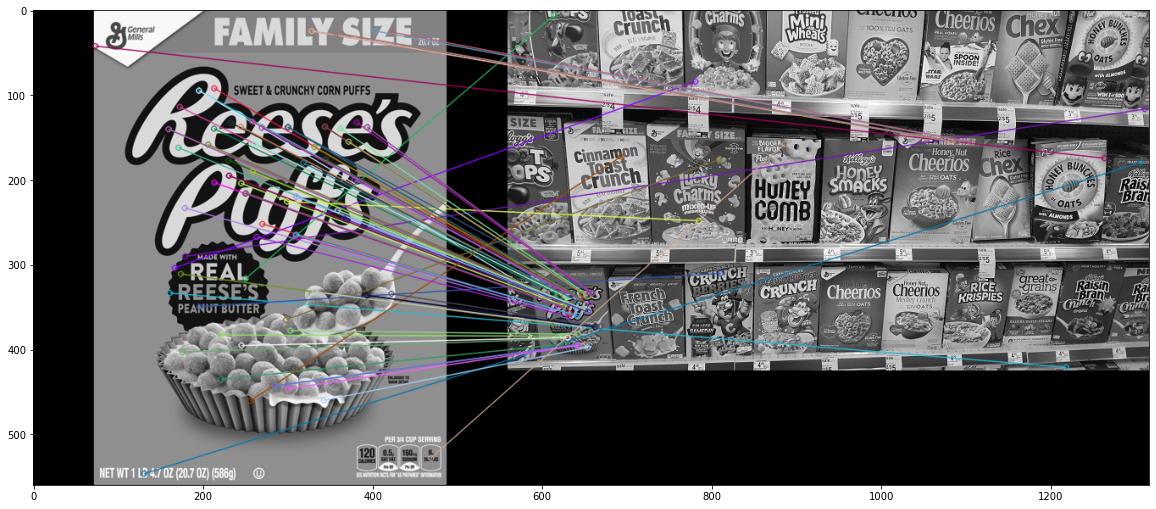

In [40]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(flann_matches)

In [42]:
#with mask
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [43]:
flann_index_KDtree = 0
index_params = dict(algorithm=flann_index_KDtree,trees=5)
search_params = dict(checks=50)

In [44]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [45]:
matches = flann.knnMatch(des1,des2,k=2)

In [46]:
#masking
matchesMask = [[0,0] for i in range(len(matches))] #bunch of zeros pure black and some will be on

In [47]:
# LESS DISTANCE -- BETTER THE MATCH
for i,(match1,match2) in enumerate(matches):
  #if MATCH1 DISTANCE is < 75% of MATCH 2 THEN IT IS A GOOD MATCH
  if match1.distance < 0.75*match2.distance:
    matchesMask[i] = [1,0]

In [52]:
draw_params = dict(matchColor=(0,255,0),
                   singlePointColor=(255,0,0),
                   matchesMask=matchesMask,
                   flags=0) #by changing flags = 2 we can remove the red dots

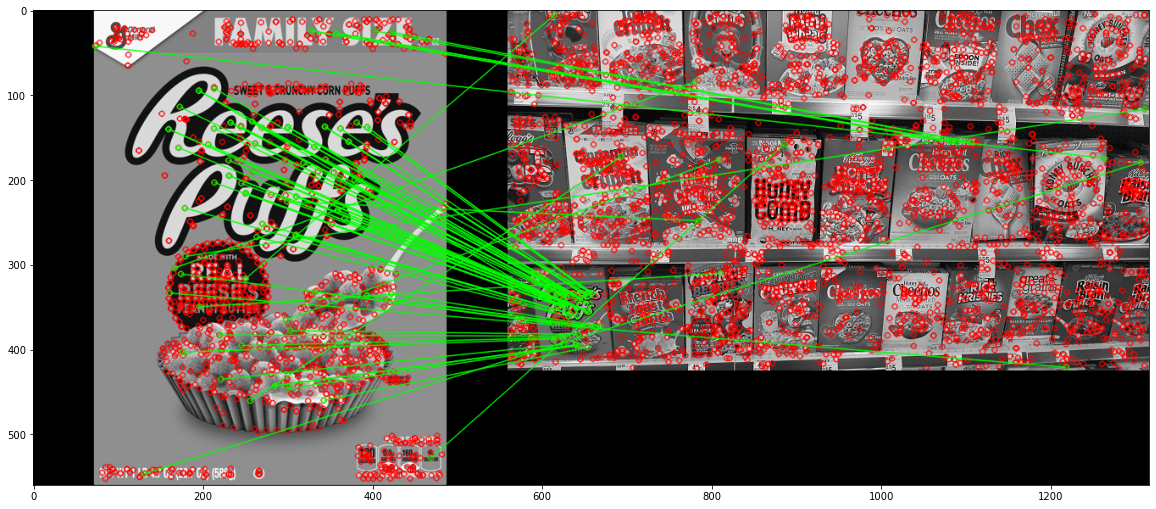

In [53]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)

# Watershed Algorithm

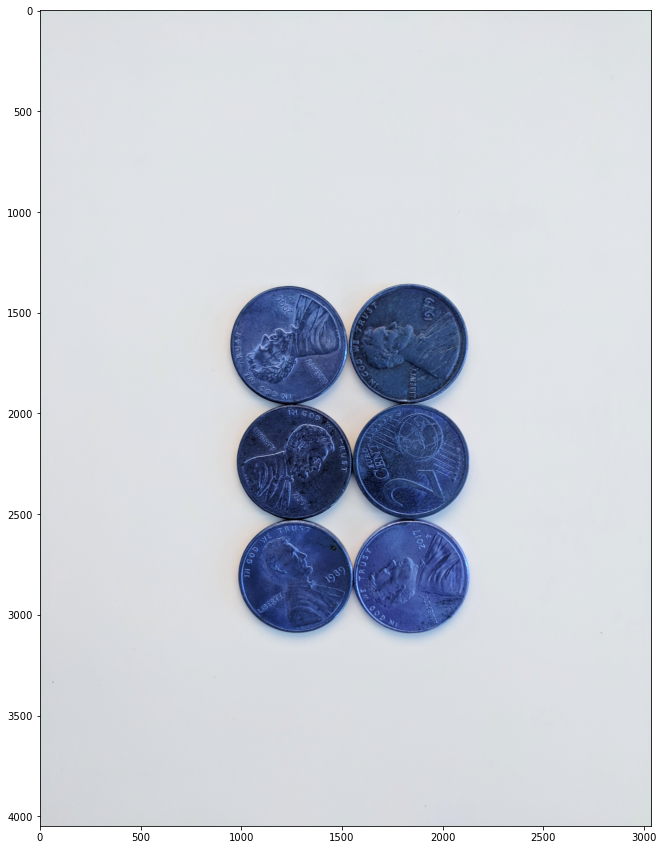

In [30]:
sep_coins = cv2.imread('pennies.jpg')
display(sep_coins)

In [31]:
# Median Blur
# Grayscale
# Binary Threshold
# find Contours

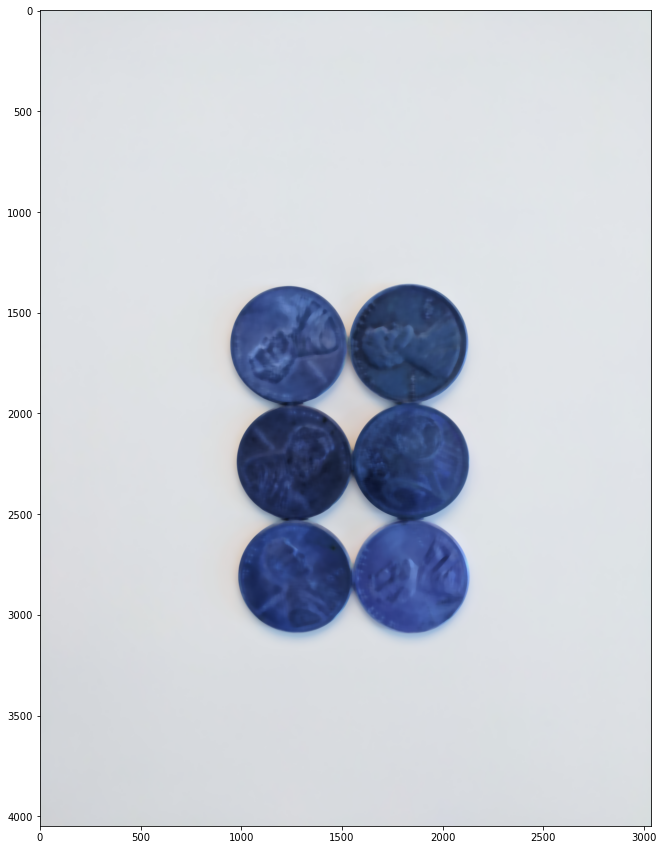

In [32]:
sep_blur = cv2.medianBlur(sep_coins,25)
display(sep_blur)

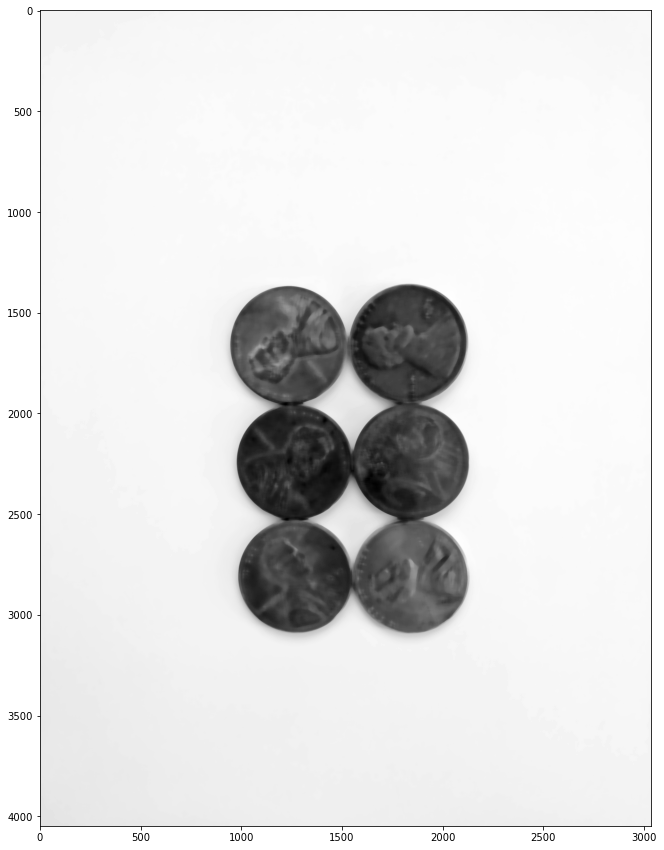

In [33]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

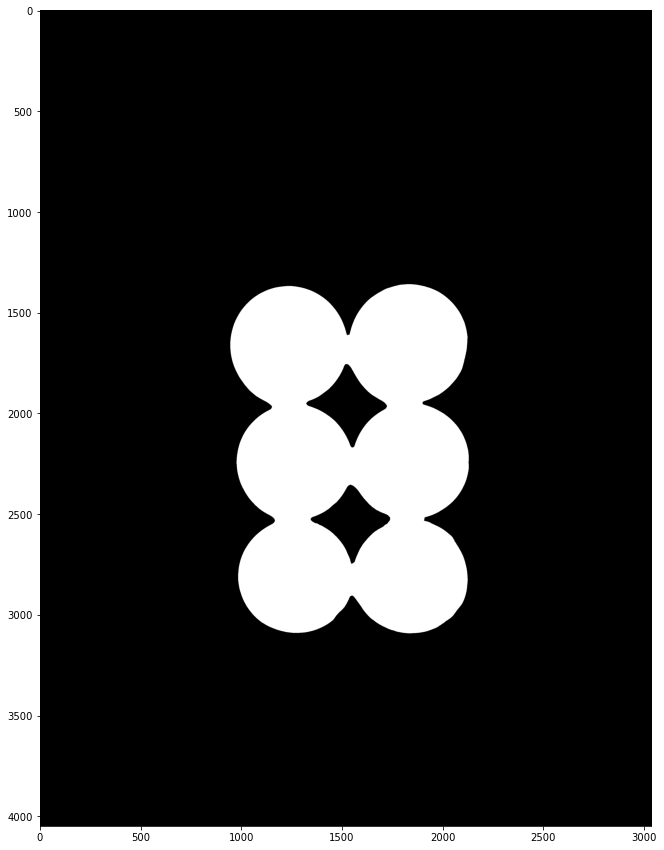

In [34]:
ret , sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [35]:
# Adjusting to OpenCV 4.x return values
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [36]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

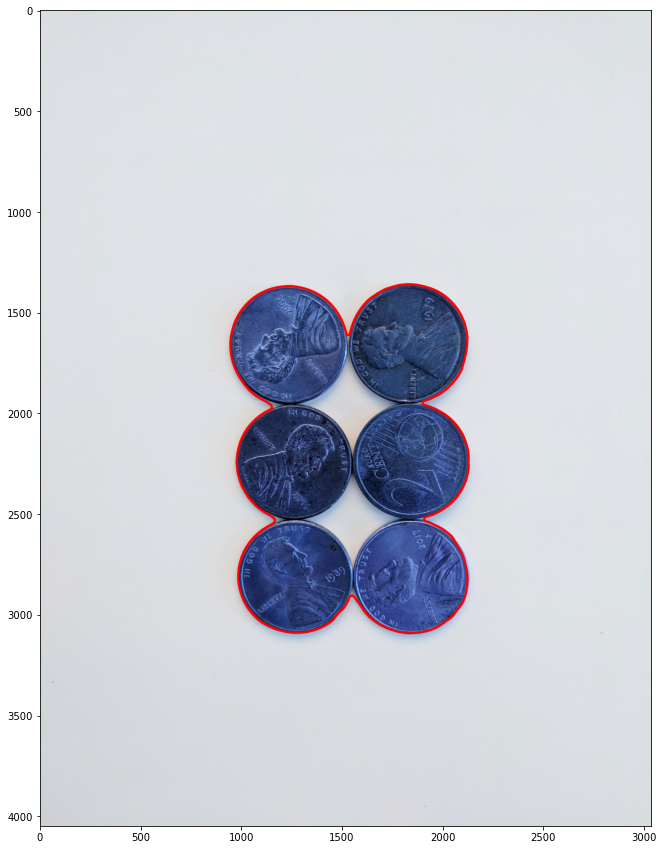

In [37]:
display(sep_coins)

In [38]:
img = cv2.imread('pennies.jpg')

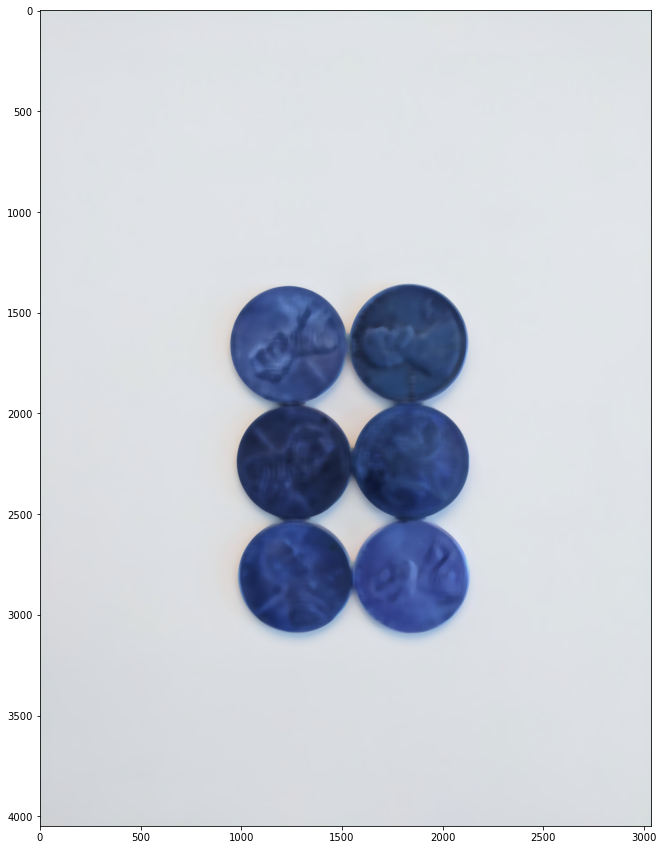

In [39]:
img = cv2.medianBlur(img,35)
display(img)

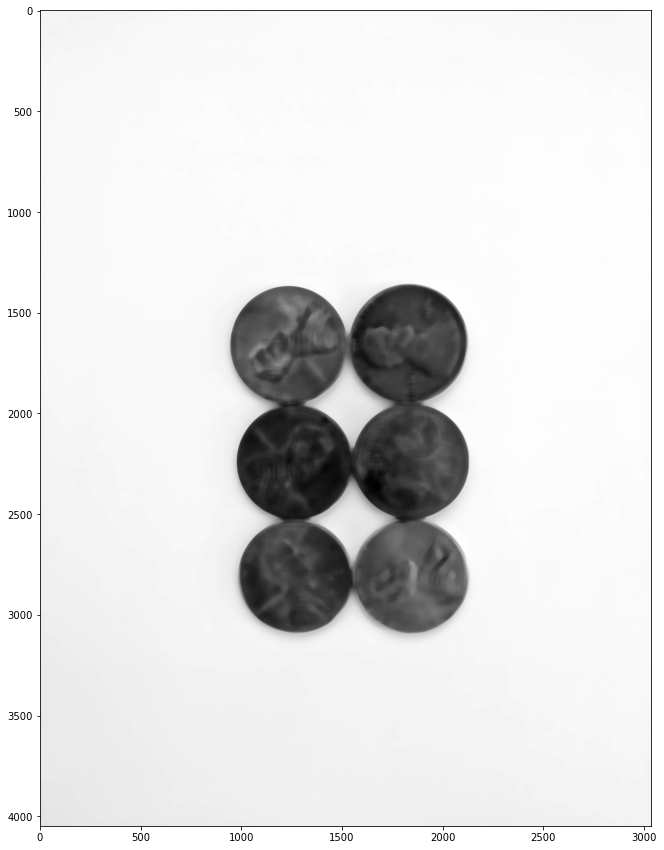

In [40]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray)

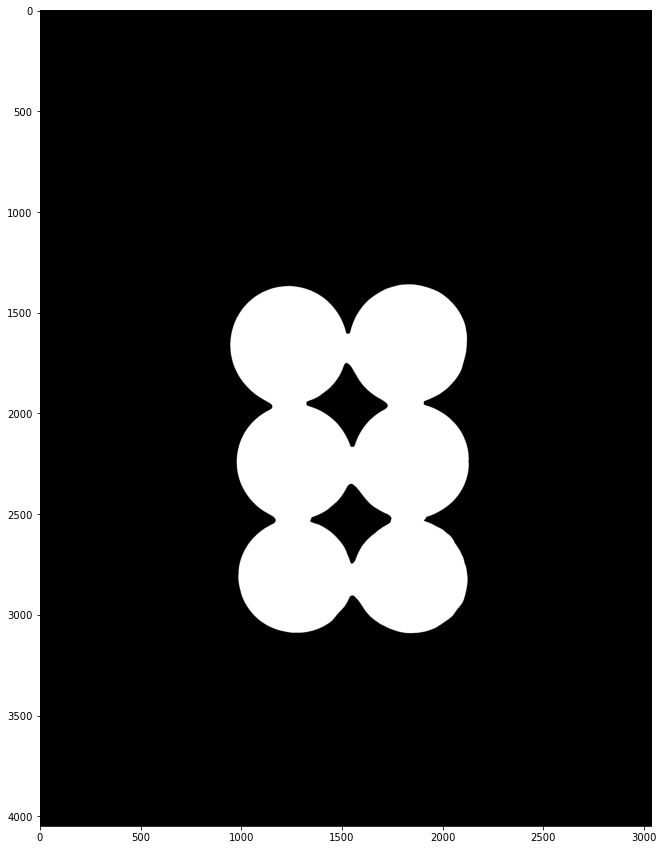

In [41]:
res,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

In [42]:
# NOISE REMOVAL (OPTIONAL)
kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

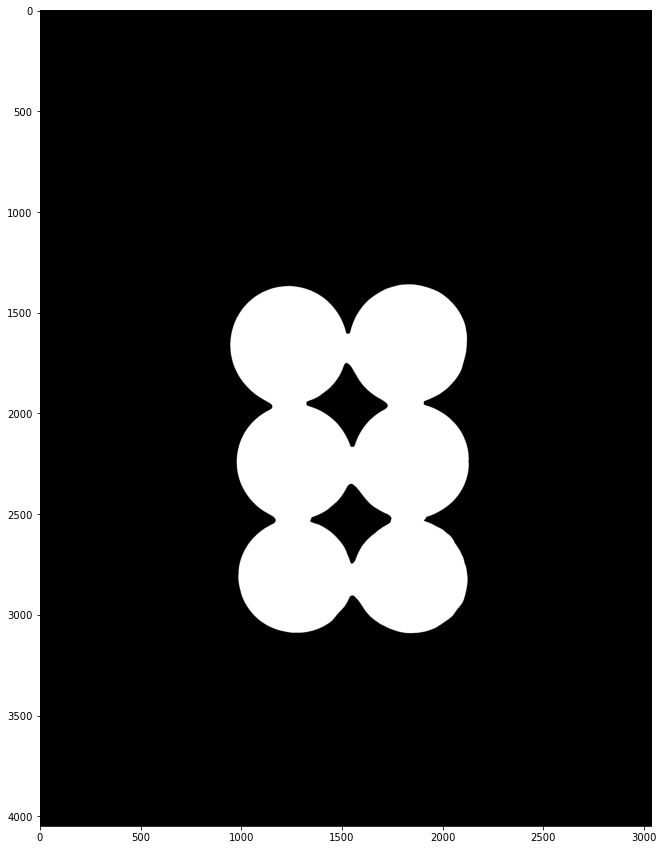

In [43]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

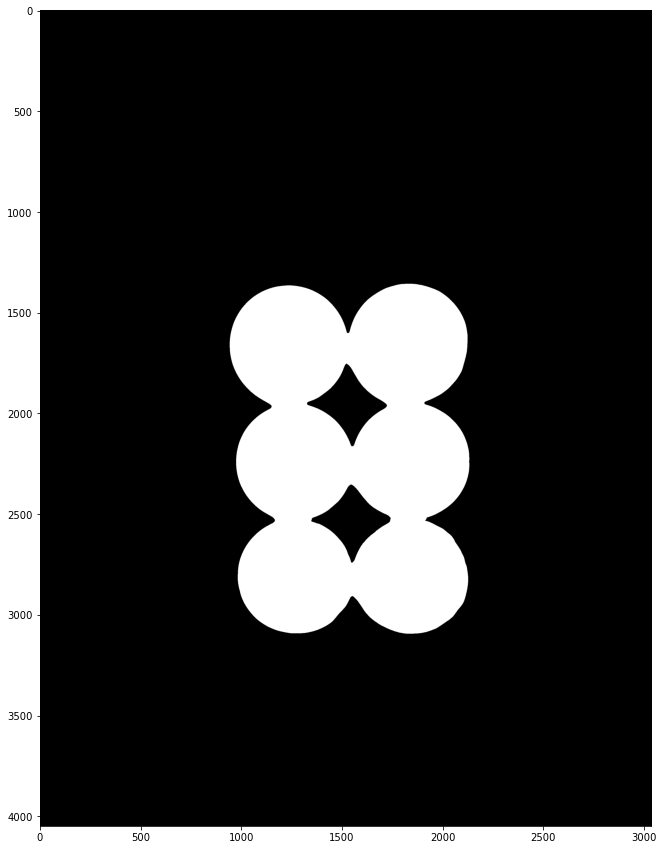

In [44]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg)

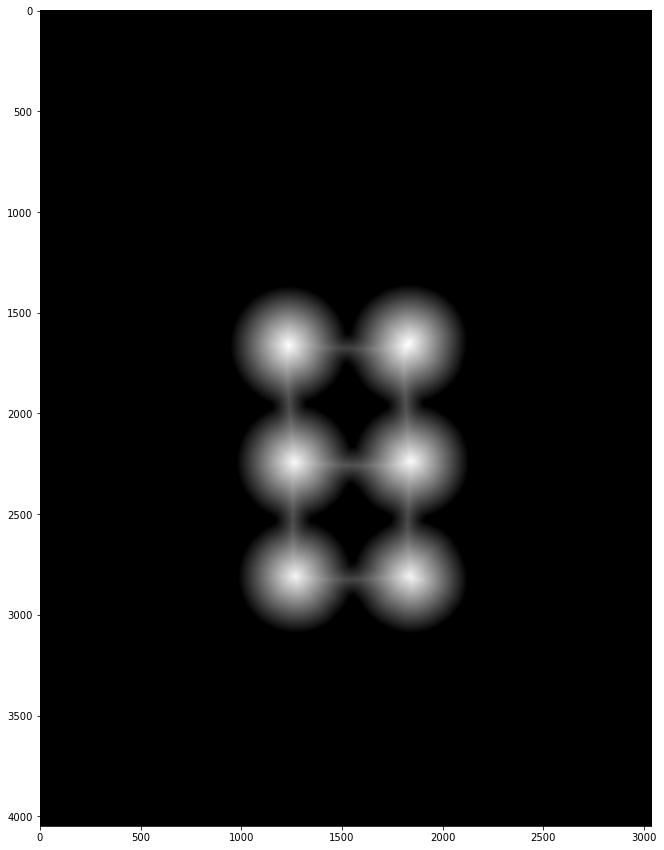

In [45]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(dist_transform)

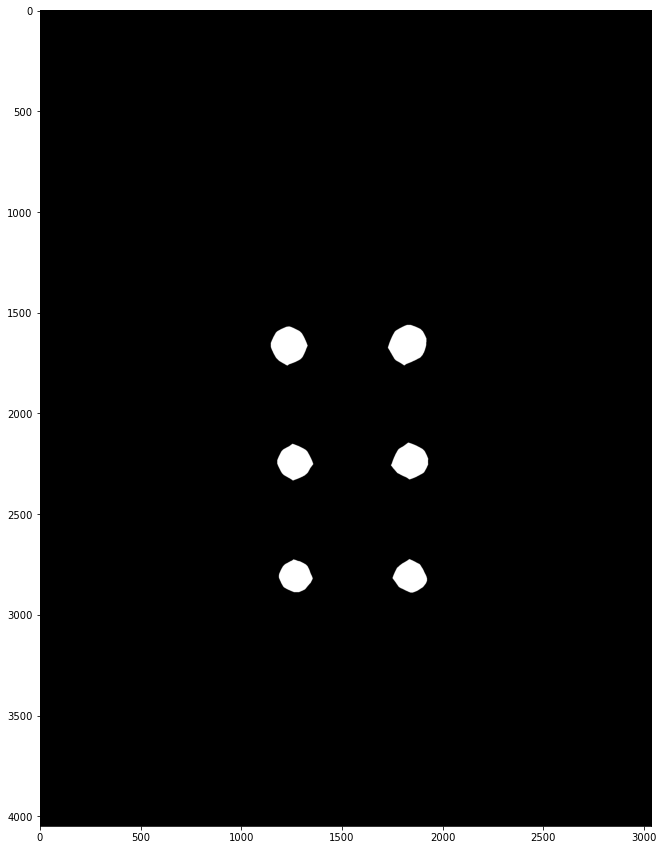

In [46]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg)

In [47]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

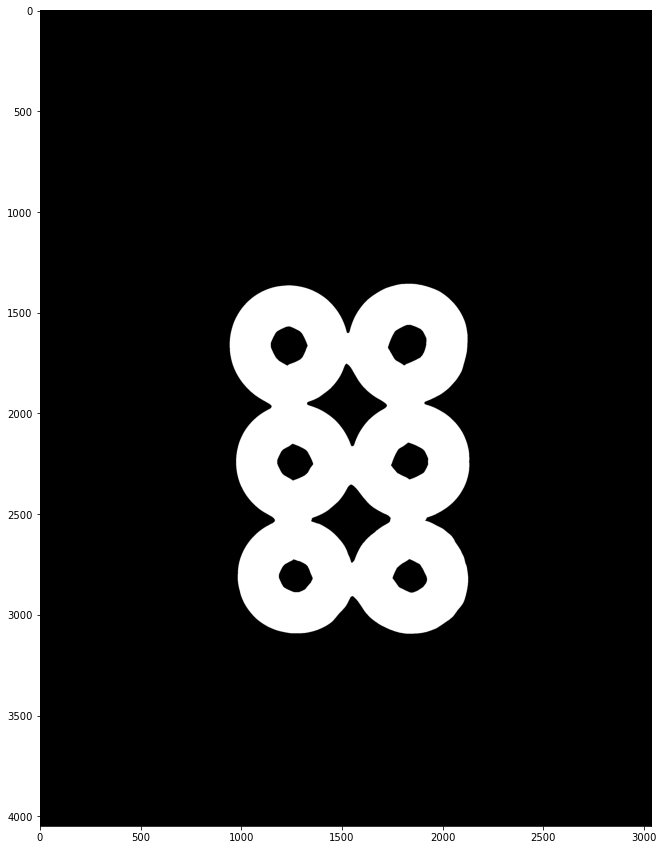

In [48]:
display(unknown)

In [49]:
ret,markers=cv2.connectedComponents(sure_fg)

In [50]:
markers = markers+1

In [51]:
markers[unknown==255] = 0

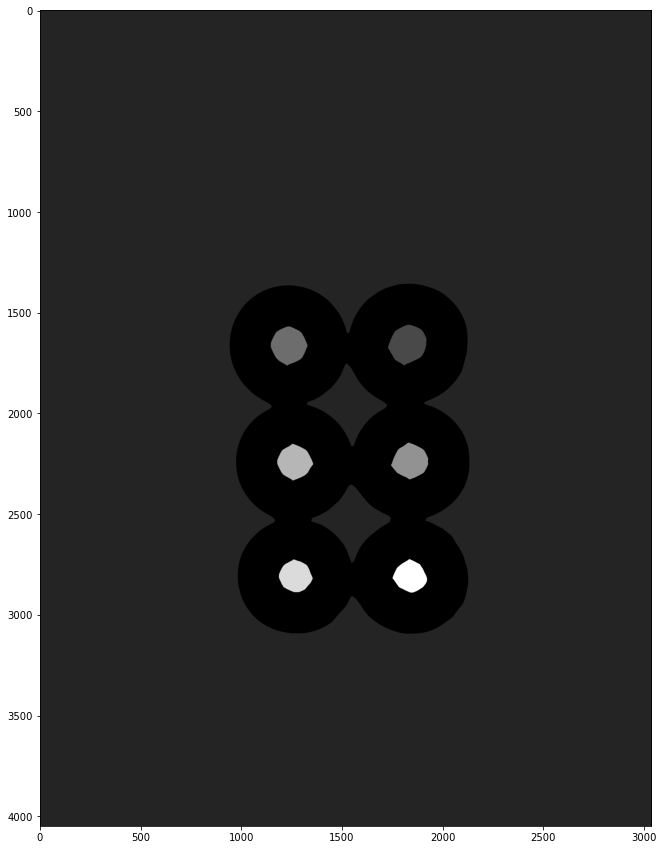

In [52]:
display(markers)

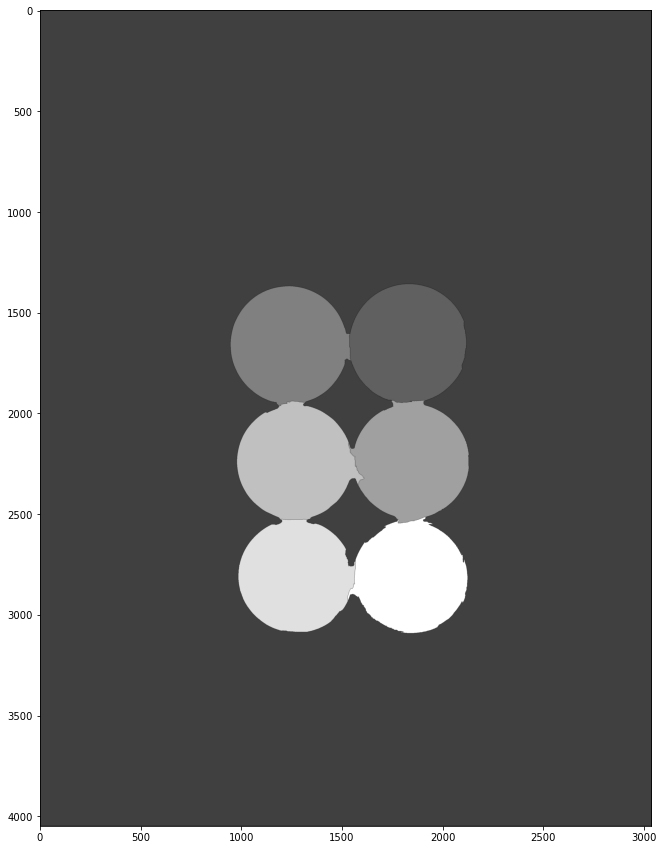

In [53]:
markers = cv2.watershed(img,markers)
display(markers)

In [54]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

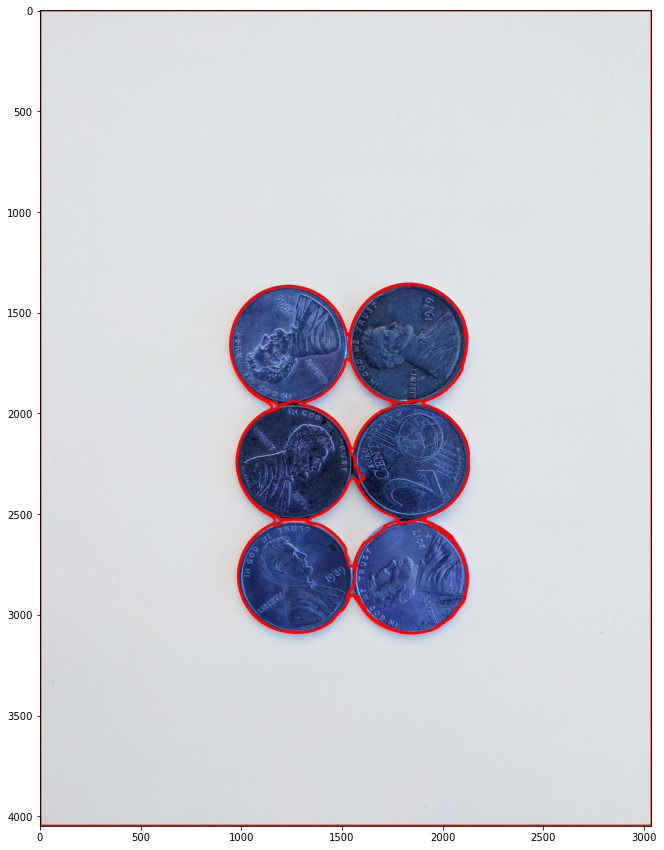

In [55]:
display(sep_coins)

# CustomSeeds_WatershedAlgorithm

In [8]:
# Load image
road = cv2.imread('road_image.jpg')
road_copy = np.copy(road)

In [9]:
road.shape[:2]

(600, 800)

In [10]:
# Create marker image and segments
marker_image = np.zeros(road.shape[:2],dtype=np.int32)
segments = np.zeros(road.shape, dtype=np.uint8)

In [11]:
# Print shapes
print(marker_image.shape)
print(segments.shape)


(600, 800)
(600, 800, 3)


In [12]:
from matplotlib import cm

In [13]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [14]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [15]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [16]:
# Global variables
# COLOR CHOICE
n_markers = 10  # 0-9
current_marker = 1
# MARKERS UPDATED BY WATERSHED
marks_updated = False

In [17]:
# Mouse callback function
def mouse_callback(event, x, y, flags, param):
    global marks_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        # Markers passed to watershed algorithm
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        # User sees on image
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True

In [18]:
# Create window and set mouse callback
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Road Image', road_copy)

    k = cv2.waitKey(1)
    if k == 27:  # Escape key
        break
    elif k == ord('c'):  # Clear all colors (user presses 'c' key)
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype=np.int32)
        segments = np.zeros(road.shape, dtype=np.uint8)
        
    elif k > 0 and chr(k).isdigit():  # Update color choice
        current_marker = int(chr(k))

    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        segments = np.zeros(road.shape, dtype=np.uint8)
        for color_ind in range(n_markers):
            # COLORING SEGMENTS , NUMPY CALL
            segments[marker_image_copy == (color_ind)] = colors[color_ind]

#         marks_updated = False

cv2.destroyAllWindows()